In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, datasets

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
plt.style.use('seaborn')

## Load Datasets

In [3]:
iris = datasets.load_iris()

## Explore Data

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Prepare Data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = iris.data[:, :2]
y = iris.target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

## Train Data

In [24]:
svm_model = svm.SVC(kernel='rbf')

In [25]:
svm_model.fit(X_train, y_train)

SVC()

## Evaluate Data

In [26]:
svm_score = svm_model.score(X_test, y_test)

In [27]:
print('Model accuracy:', svm_score)

Model accuracy: 0.8333333333333334


## Plot SVM Results

<ipython-input-29-bba9b7a5d596>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 1, 1)


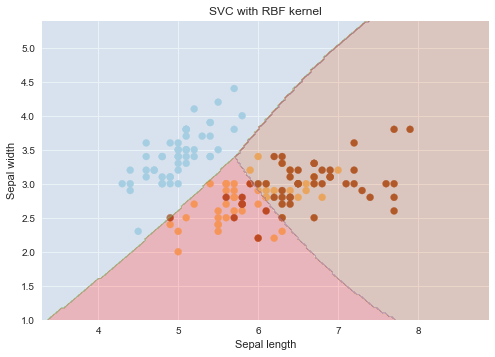

In [29]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')

plt.subplot(1, 1, 1)
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.25)

## Save Model

In [14]:
import pickle

In [16]:
# save to file in the current working directory
pkl_filename = "svm_model.pkl"

In [18]:
with open(pkl_filename, 'wb') as file:
    pickle.dump(svm_model, file)

## Load Model

In [20]:
# load from pickle file
with open(pkl_filename, 'rb') as file:
    svm_model = pickle.load(file)

In [21]:
svm_score = svm_model.score(X_test, y_test)

In [22]:
print('Model accuracy:', svm_score)

Model accuracy: 0.7777777777777778


---